## Load libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from IPython.display import SVG, display
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools

# vae stuff
from chemvae import mol_utils as mu
from chemvae.vae_utils import VAEUtils

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.
/home/beangoben/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Load a model

In [2]:
exp_dir='../models/zinc_properties'

vae = VAEUtils(directory=exp_dir)

/home/beangoben/miniconda3/lib/python3.6/site-packages/keras/models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Using standarized functions? False
Standarization: estimating mu and std values ...done!


# Using the VAE


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [15]:
smiles_1 = mu.canon_smiles('O=C(NCCNC(=O)c1ccccc1)N[C@H]1CC(=O)N(C2CC2)C1')


X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)

z_1 = vae.encode(X_1)

X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

Input                : O=C(NCCNC(=O)c1ccccc1)N[C@H]1CC(=O)N(C2CC2)C1
Reconstruction       : O/C(NCCNC(=O)c1ccccc1)N[C@H]1CC(=O)N(C2C@2)C1
Z representation     : (1, 196) with norm 0.502


## property preditor

In [4]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)[0]
print(y_1)

Properties (qed,SAS,logP):
[ 0.77286768  2.43317604  0.95585614]


## Decode several attempts
VAE are probabilistic

Searching molecules randomly sampled from 1.00 std (z-distance) from the point
Found 14 unique mols, out of 73
SMILES
 0     CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
1     CSC(C=O)NNC(=O)c1c(C)oc(C)c1C
2     COCC(=O)NNC(=O)c1c(C)oc(C)c1C
3     CSCC(=O)NCC(=O)c1c(C)oc(C)c1C
4     CSC(=O)NNNC(=O)c1c(C)oc(C)c1C
5     COCC(=O)NCC(=O)c1c(C)oc(C)c1C
6     CSC(C=O)NCC(=O)c1c(C)oc(C)c1C
7     COC(C=O)NC(C=O)c1c(C)oc(C)c1C
8     CSC(N=O)NCC(=O)c1c(C)oc(C)c1C
9     CSC(=O)NNCC(=O)c1c(C)oc(C)c1C
10    COC(C=O)NCC(=O)c1c(C)oc(C)c1C
11    CSC(C=O)N/C(=O)c1c(C)oc(C)c1C
12    ClCC(=O)NNC(=O)c1c(C)oc(C)c1C
13    ClCC(=O)NCC(=O)c1c(C)oc(C)c1C
Name: smiles, dtype: object


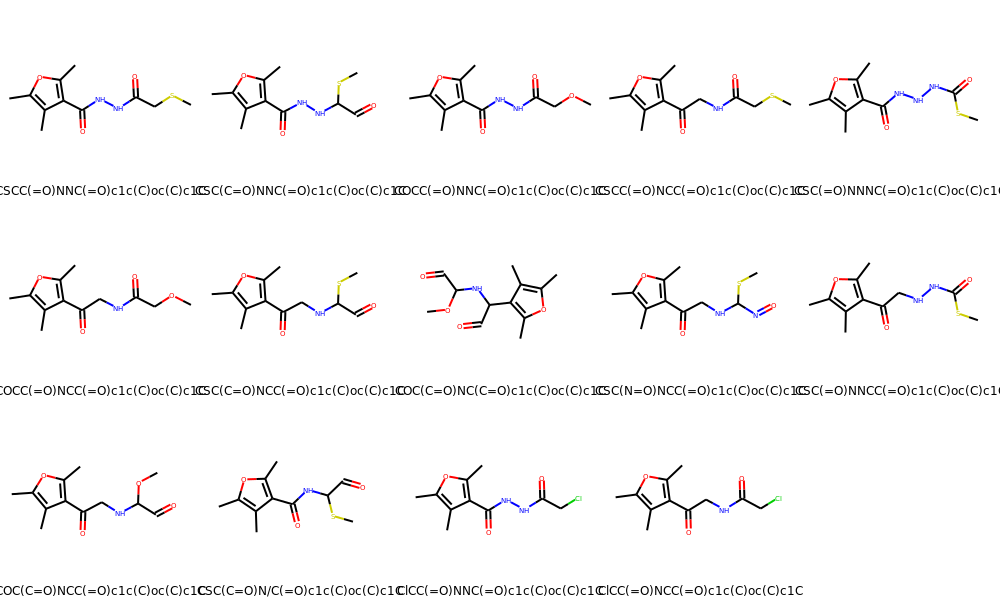

,smiles,distance,count,frequency,mol
0,CSCC(=O)NNC(=O)c1c(C)oc(C)c1C,1.525108e-07,5,0.068493,"<img src="""" alt=""Mol""/>"
1,CSC(C=O)NNC(=O)c1c(C)oc(C)c1C,9.988420e-02,4,0.054795,"<img src="""" alt=""Mol""/>"
2,COCC(=O)NNC(=O)c1c(C)oc(C)c1C,1.084291e-01,2,0.027397,"<img src="""" alt=""Mol""/>"
3,CSCC(=O)NCC(=O)c1c(C)oc(C)c1C,1.515716e-01,21,0.287671,"<img src="""" alt=""Mol""/>"
4,CSC(=O)NNNC(=O)c1c(C)oc(C)c1C,1.657350e-01,1,0.013699,"<img src="""" alt=""Mol""/>"

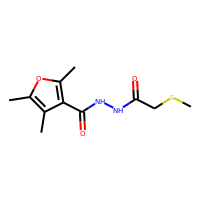
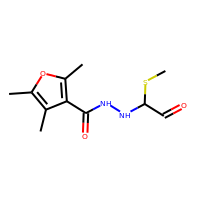
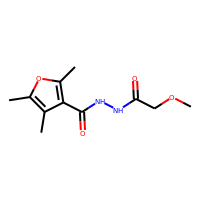
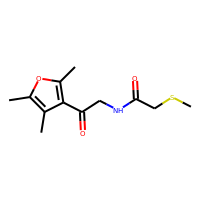
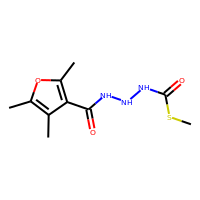

In [6]:
noise=1.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()

## PCA of latent space
VAE are probabilistic

In [7]:
Z, data, smiles = vae.ls_sampler_w_prop(return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

,index,logP,qed,SAS,smiles
0,0,5.05060,0.702012,2.084095,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
1,1,3.11370,0.928975,3.432004,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
2,2,4.96778,0.599682,2.470633,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1
3,3,4.00022,0.690944,2.822753,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1
4,4,3.60956,0.789027,4.035182,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#N)C12CCCCC2


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
Explained variance in 2-D: 0.04


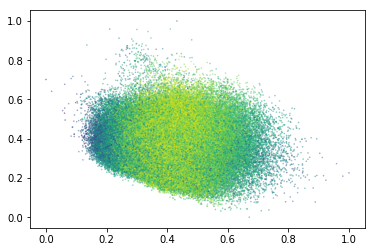

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(n_components=2)
print(pca)

pca.fit(Z)
Z_pca = pca.transform(Z)
print('Explained variance in 2-D: {:.2f}'.format(sum(pca.explained_variance_[:2])))

scaler = MinMaxScaler()
Z_pca = scaler.fit_transform(Z_pca)
df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'],
           y=df['y'],
           c=df[prop_opt],
           cmap= mpl.cm.get_cmap('viridis'), marker='.', s=10,alpha=0.5, edgecolors='none')
plt.show()